In [1]:
import numpy as np
from sklearn import datasets

In [2]:
iris = datasets.load_iris()
iris_X= iris.data
iris_y= iris.target
np.unique(iris_y)

array([0, 1, 2])

In [5]:
print type(iris_X)
iris_X.shape[0]

<type 'numpy.ndarray'>


150

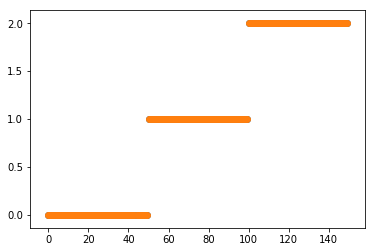

In [8]:
import matplotlib.pyplot as plt
plt.scatter(range(150),iris_y)
plt.show()

In [3]:
np.random.seed(0)
indices=np.random.permutation(len(iris_X))
iris_X_train = iris_X[indices[:-10]]
iris_y_train=iris_y[indices[:-10]]
iris_X_test = iris_X[indices[-10:]]
iris_y_test=iris_y[indices[-10:]]

In [4]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(iris_X_train,iris_y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [5]:
from sklearn.metrics import accuracy_score
knn.predict(iris_X_test)

array([1, 2, 1, 0, 0, 0, 2, 1, 2, 0])

In [6]:
iris_y_test

array([1, 1, 1, 0, 0, 0, 2, 1, 2, 0])

In [7]:
acc=accuracy_score(iris_y_test,knn.predict(iris_X_test))

In [8]:
print "Error rate of this classifier:",1-acc

Error rate of this classifier: 0.1


In [9]:
from sklearn.neighbors import KNeighborsClassifier
k=1
best_acc=0
best_k=0
while(k<100):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(iris_X_train,iris_y_train)
    acc=accuracy_score(iris_y_test,knn.predict(iris_X_test))
    if(acc>best_acc):
        best_acc=acc
        best_k=k
    k=k+1
print "the optimal parameter k:",best_k
print "the best accuracy:",best_acc

the optimal parameter k: 8
the best accuracy: 1.0


In [10]:
new_knn = KNeighborsClassifier()

In [11]:
from sklearn.model_selection import cross_val_score
knn_score=cross_val_score(new_knn,iris_X,iris_y)
knn_score.mean()

0.98692810457516345

In [20]:
from sklearn.svm import SVC
svm=SVC()
svm_score=cross_val_score(svm,iris_X,iris_y)
svm_score.mean()

0.97344771241830064

In [24]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(multi_class="multinomial",solver="sag")
lr_score=cross_val_score(lr,iris_X,iris_y)
lr_score.mean()

//anaconda/lib/python2.7/site-packages/sklearn/linear_model/sag.py:286: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


0.98039215686274517

In [25]:
result=[]
result.append(knn_score)
result.append(svm_score)
result.append(lr_score)


In [26]:
name=['KNN',"SVM","LogisRegression"]

In the second part, I try the logistic Regression and the svm.
For thosse three models, I use the cross-valid in sklearn.
Compare those three models, I found that the KNN is the best model.
Because in this case, the iris in the space is not complexe. 
So when I run the KNN, it use the distance and it could eaily find k nearest neighbors, and it could find the correct label.
For the logistic regression, I choose the multi_class, because in this case, we have 3 different labels.
But I still don't know why KNN is the best model, and SVM doesn't work very well in this case.

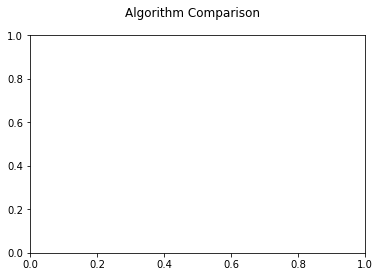

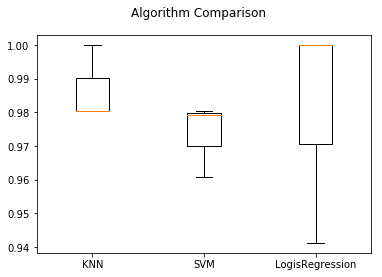

In [29]:
import matplotlib.pyplot as plt
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(result)
ax.set_xticklabels(name)
plt.show()